In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the data
file_path = 'articulation_angle_log.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure that timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

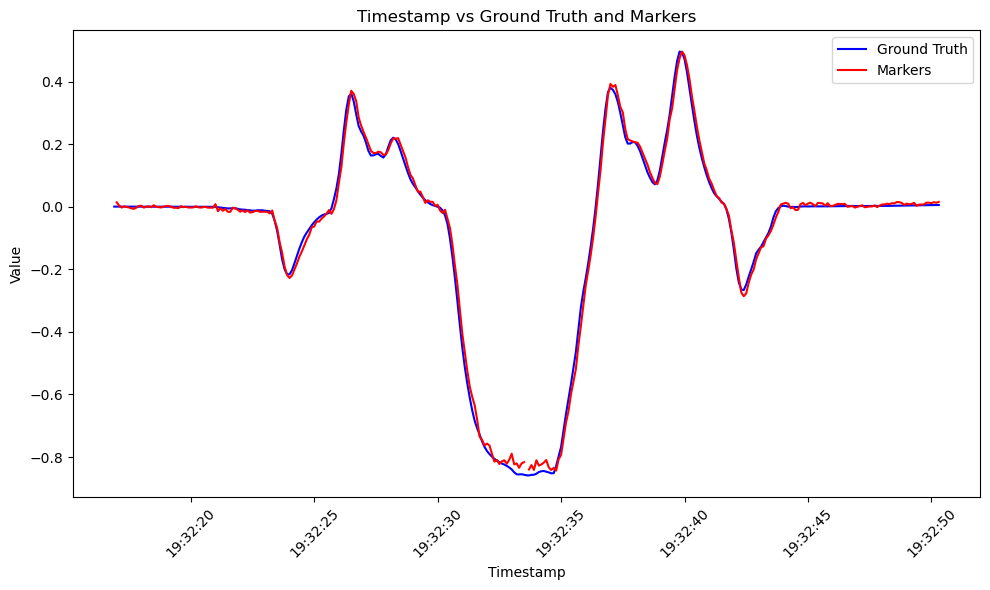

In [41]:
# Convert the columns to numpy arrays to avoid the multi-dimensional indexing issue
ground_truth = resampled_data['ground_truth'].to_numpy()
markers = resampled_data['filtered'].to_numpy()
timestamps = resampled_data.index.to_numpy()

# Plotting Timestamp vs ground_truth and marker on the same plot
plt.figure(figsize=(10, 6))

# Plotting ground_truth
plt.plot(timestamps, ground_truth, label='Ground Truth', color='blue')

# Plotting marker
plt.plot(timestamps, markers, label='Markers', color='red')

# Adding titles and labels
plt.title('Timestamp vs Ground Truth and Markers')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Adding a legend
plt.legend()

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
# Create datasets
df_ground_truth = df[['timestamp', 'ground_truth']].dropna(subset=['ground_truth'])
df_marker = df[['timestamp', 'markers']].dropna(subset=['markers'])
df_range = df[['timestamp', 'range']].dropna(subset=['range'])
df_filtered = df[['timestamp', 'filtered']].dropna(subset=['filtered'])

# Convert to NumPy arrays explicitly for plotting
timestamps_gt = df_ground_truth['timestamp'].to_numpy()
ground_truth_values = df_ground_truth['ground_truth'].to_numpy()

timestamps_marker = df_marker['timestamp'].to_numpy()
markers_values = df_marker['markers'].to_numpy()

timestamps_range = df_range['timestamp'].to_numpy()
range_values = df_range['range'].to_numpy()

timestamps_filtered = df_filtered['timestamp'].to_numpy()
filtered_values = df_filtered['filtered'].to_numpy()

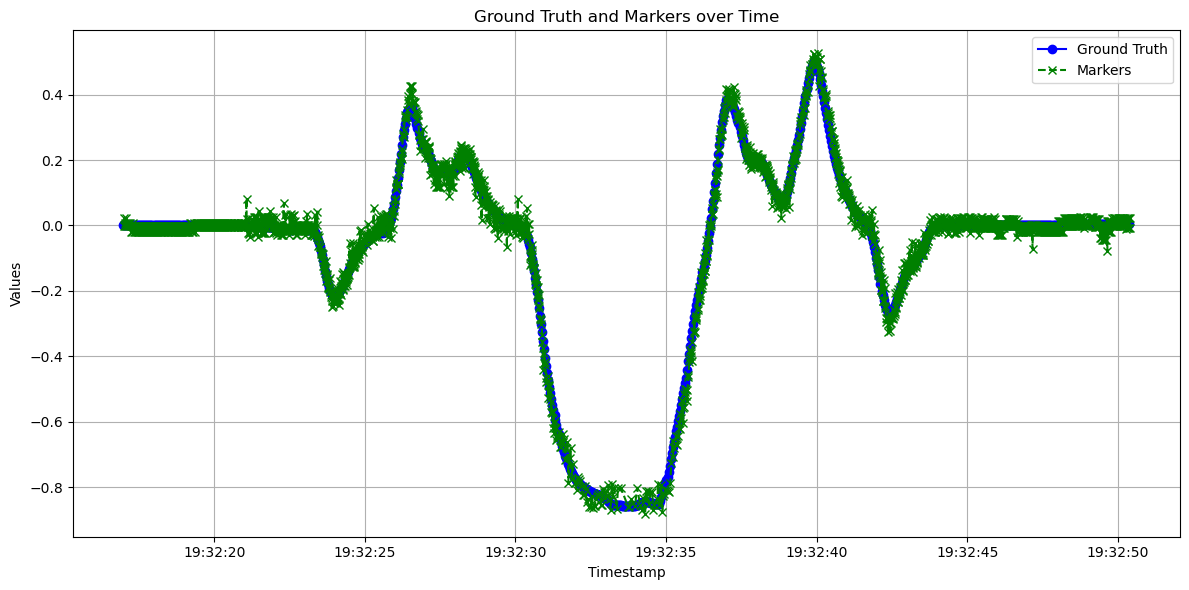

In [4]:
# Plot 1: Timestamp vs Ground Truth and Marker
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_marker, markers_values, label='Markers', marker='x', linestyle='--', color='green')

plt.title('Ground Truth and Markers over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


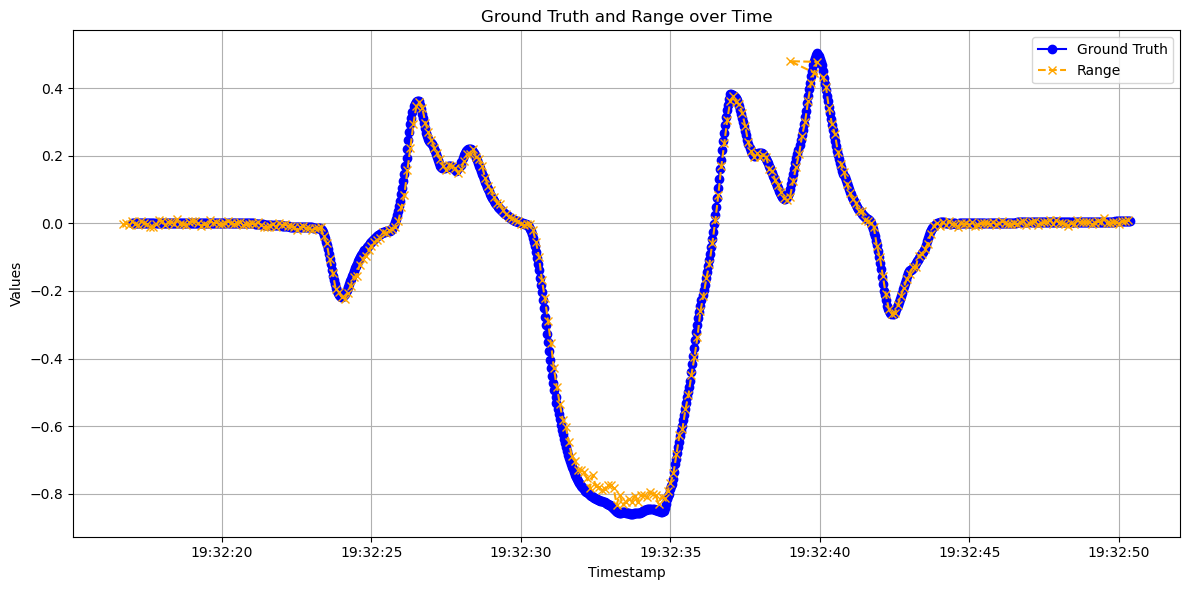

In [5]:
# Plot 2: Timestamp vs Ground Truth and Range
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_range, range_values, label='Range', marker='x', linestyle='--', color='orange')

plt.title('Ground Truth and Range over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

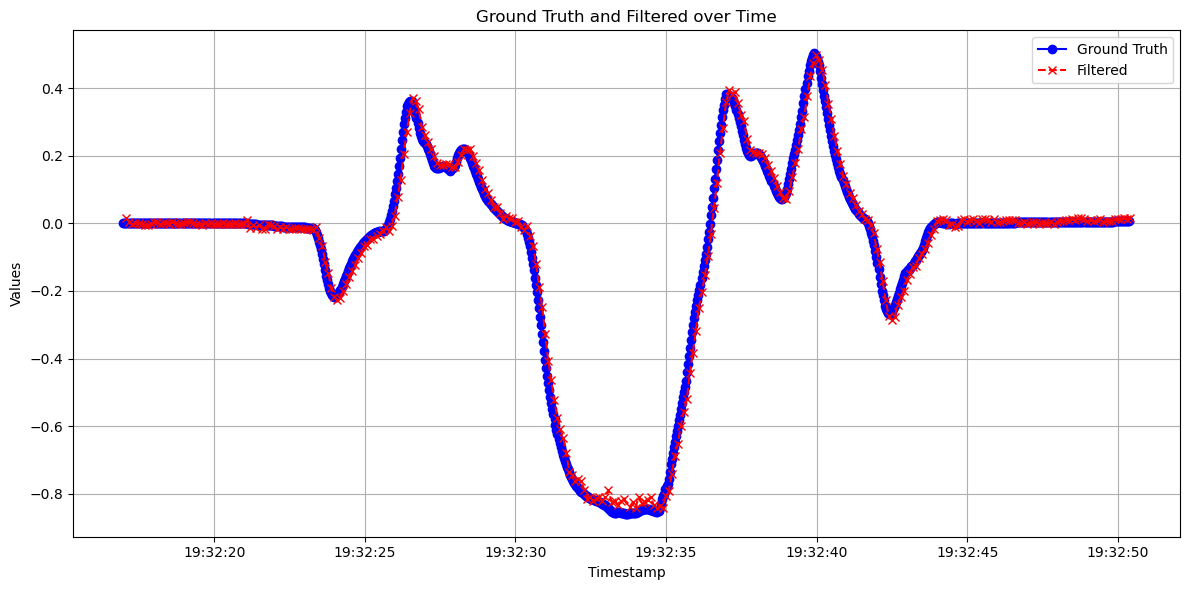

In [6]:
# Plot 3: Timestamp vs Ground Truth and Filtered
plt.figure(figsize=(12, 6))
plt.plot(timestamps_gt, ground_truth_values, label='Ground Truth', marker='o', linestyle='-', color='blue')
plt.plot(timestamps_filtered, filtered_values, label='Filtered', marker='x', linestyle='--', color='red')

plt.title('Ground Truth and Filtered over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
data = pd.read_csv(file_path)

# Interpolate missing values in the dataset
data_interpolated = data.interpolate(method='linear')

# Apply forward fill to handle any remaining NaN values
data_filled = data_interpolated.fillna(method='ffill').fillna(method='bfill')

# Recalculate the MAE and RMSE after forward fill
mae_markers = mean_absolute_error(data_filled['ground_truth'], data_filled['markers'])
mae_range = mean_absolute_error(data_filled['ground_truth'], data_filled['range'])
mae_filtered = mean_absolute_error(data_filled['ground_truth'], data_filled['filtered'])

rmse_markers = np.sqrt(mean_squared_error(data_filled['ground_truth'], data_filled['markers']))
rmse_range = np.sqrt(mean_squared_error(data_filled['ground_truth'], data_filled['range']))
rmse_filtered = np.sqrt(mean_squared_error(data_filled['ground_truth'], data_filled['filtered']))


# Define the acceptable error threshold in radians (1 degree = 0.0174533 radians)
threshold_radians = 0.0174533

# Calculate the accuracy for each method in percentage
accuracy_markers = np.mean(np.abs(data_filled['ground_truth'] - data_filled['markers']) <= threshold_radians) * 100
accuracy_range = np.mean(np.abs(data_filled['ground_truth'] - data_filled['range']) <= threshold_radians) * 100
accuracy_filtered = np.mean(np.abs(data_filled['ground_truth'] - data_filled['filtered']) <= threshold_radians) * 100

# Output the results
print(f"Accuracy (Markers): {accuracy_markers} %")
print(f"Accuracy (Range): {accuracy_range} %")
print(f"Accuracy (Filtered): {accuracy_filtered} %")
print("\n")
print("MAE (Markers):", mae_markers)
print("MAE (Range):", mae_range)
print("MAE (Filtered):", mae_filtered)
print("\n")
print("RMSE (Markers):", rmse_markers)
print("RMSE (Range):", rmse_range)
print("RMSE (Filtered):", rmse_filtered)
print("\n")


Accuracy (Markers): 64.77819347942277 %
Accuracy (Range): 77.68572955638696 %
Accuracy (Filtered): 59.54035275253875 %


MAE (Markers): 0.015915452953389742
MAE (Range): 0.011975530243134278
MAE (Filtered): 0.018761651739338258


RMSE (Markers): 0.021520815148756103
RMSE (Range): 0.01892853813880814
RMSE (Filtered): 0.026414840821644487




/tmp/ipykernel_91853/3572935940.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data_interpolated.fillna(method='ffill').fillna(method='bfill')


In [ ]:
import numpy as np

# Extract the timestamp column
timestamps = df_filtered['timestamp']

# Calculate the time differences between consecutive samples
time_diffs = np.diff(timestamps)

# Assuming time_diffs is in nanoseconds, convert it to seconds
time_diffs_seconds = time_diffs / np.timedelta64(1, 's')

# Define a threshold to exclude outliers (e.g., exclude time differences greater than 1 second)
threshold = 1  # 1 second

# Filter out the outliers
filtered_time_diffs = time_diffs_seconds[time_diffs_seconds <= threshold]

# Recalculate the average time difference without outliers
average_time_diff_filtered = np.mean(filtered_time_diffs)

# Calculate the corrected sampling rate without outliers
sampling_rate_corrected_no_outliers = 1 / float(average_time_diff_filtered)

# Output the new sampling rate
print("Corrected Sampling Rate without Outliers (samples per second):", sampling_rate_corrected_no_outliers)

In [45]:
import pandas as pd

# Load the data
file_path = 'articulation_angle_log.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Convert timestamp to datetime for easier manipulation
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')


data['id'] = (data.index // 100)
# Compute the mean ground truth per 100 values, ignoring NaNs
mean_per_id = data.groupby('id')['ground_truth'].transform('mean')
# Fill the null values in 'ground_truth' column with the calculated means
data['ground_truth'].fillna(mean_per_id, inplace=True)



mean_per_id = data.groupby('id')['markers'].transform('mean')
data['markers'].fillna(mean_per_id, inplace=True)


mean_per_id = data.groupby('id')['range'].transform('mean')
data['range'].fillna(mean_per_id, inplace=True)


mean_per_id = data.groupby('id')['filtered'].transform('mean')
data['filtered'].fillna(mean_per_id, inplace=True)


# Drop the helper column
data.drop(columns='id', inplace=True)
data.to_csv('new_data.csv')


/tmp/ipykernel_91853/3894607579.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ground_truth'].fillna(mean_per_id, inplace=True)
/tmp/ipykernel_91853/3894607579.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### Downsampling for performance evaluation

In [ ]:
import pandas as pd

# Load the data
file_path = 'articulation_angle_log.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Convert timestamp to datetime for easier manipulation
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Resample the data to 1 millisecond intervals, computing the mean for each interval
resampled_data = data.resample('100ms', on='timestamp').mean()

# Dropping rows where all values are NaN after resampling
resampled_data = resampled_data.dropna(how='all')

# Display the processed data
print(resampled_data.head())

# Optionally, save the processed data to a new CSV file
resampled_data.to_csv('aggregated_data.csv')
